### Import Data and Libraries

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

soil = pd.read_excel("Hawiian_Soils2.xlsx")
soil.head()

Populating the interactive namespace from numpy and matplotlib


,Soil_Sample,NTM culture,Microbiome,Latitude,Longitude,Address:,Town:,Zip,pH,Calcite,...,Magnetite,Quartz,Gibbsite,Montmorillonite,Palygorksite,Halloysite,Kaolinite,Kaol. + Halloysite,% Kaolinite,% Halloysite
0,BGLD12_2,neg.,no,19.715265,-155.084910,Ululani St.,Hilo,96720.0,4.97,0.000000,...,3.868190,0.031278,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN
1,BGLD12_4,neg.,no,19.675419,-155.090209,474 Awela St.,Hilo,96720.0,5.98,4.615385,...,6.461538,8.000000,17.846154,0.0,0.0,1.538462,2.307692,3.846154,3.846154,0.0
2,HNL-12_1,neg.,no,21.306053,-157.835709,1333 Heulu St.,Honolulu,96822.0,5.79,1.303781,...,5.867014,6.649283,0.000000,0.0,0.0,4.172099,0.000000,4.172099,4.172099,0.0
3,HNL-12_16,neg.,no,21.422187,-157.954707,2276 Aumakua St.,Pearl City,96782.0,7.65,0.000000,...,1.794555,17.369751,2.594887,0.0,0.0,2.772241,57.936271,60.708512,60.708512,0.0
4,HNL-12_17,neg.,no,21.318042,-157.808551,2562 Olopua St.,Honolulu,96822.0,6.79,0.000000,...,4.666648,1.460627,8.442178,0.0,0.0,34.269674,8.324827,42.594501,42.594501,0.0


In [195]:
soil_numeric = soil.drop(soil.columns[3:8], axis=1)
soil_numeric.head()

,Soil_Sample,NTM culture,Microbiome,pH,Calcite,Mg Calcite,Aragonite,Gypsum,Bassanite,Hexahydrite,...,Magnetite,Quartz,Gibbsite,Montmorillonite,Palygorksite,Halloysite,Kaolinite,Kaol. + Halloysite,% Kaolinite,% Halloysite
0,BGLD12_2,neg.,no,4.97,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,3.868190,0.031278,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN
1,BGLD12_4,neg.,no,5.98,4.615385,0.000000,1.384615,0.0,0.0,0.0,...,6.461538,8.000000,17.846154,0.0,0.0,1.538462,2.307692,3.846154,3.846154,0.0
2,HNL-12_1,neg.,no,5.79,1.303781,11.734029,0.000000,0.0,0.0,0.0,...,5.867014,6.649283,0.000000,0.0,0.0,4.172099,0.000000,4.172099,4.172099,0.0
3,HNL-12_16,neg.,no,7.65,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.794555,17.369751,2.594887,0.0,0.0,2.772241,57.936271,60.708512,60.708512,0.0
4,HNL-12_17,neg.,no,6.79,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,4.666648,1.460627,8.442178,0.0,0.0,34.269674,8.324827,42.594501,42.594501,0.0


### Heatmap

Text(0.5,0.98,u'Soil Attributes Correlation Heatmap')

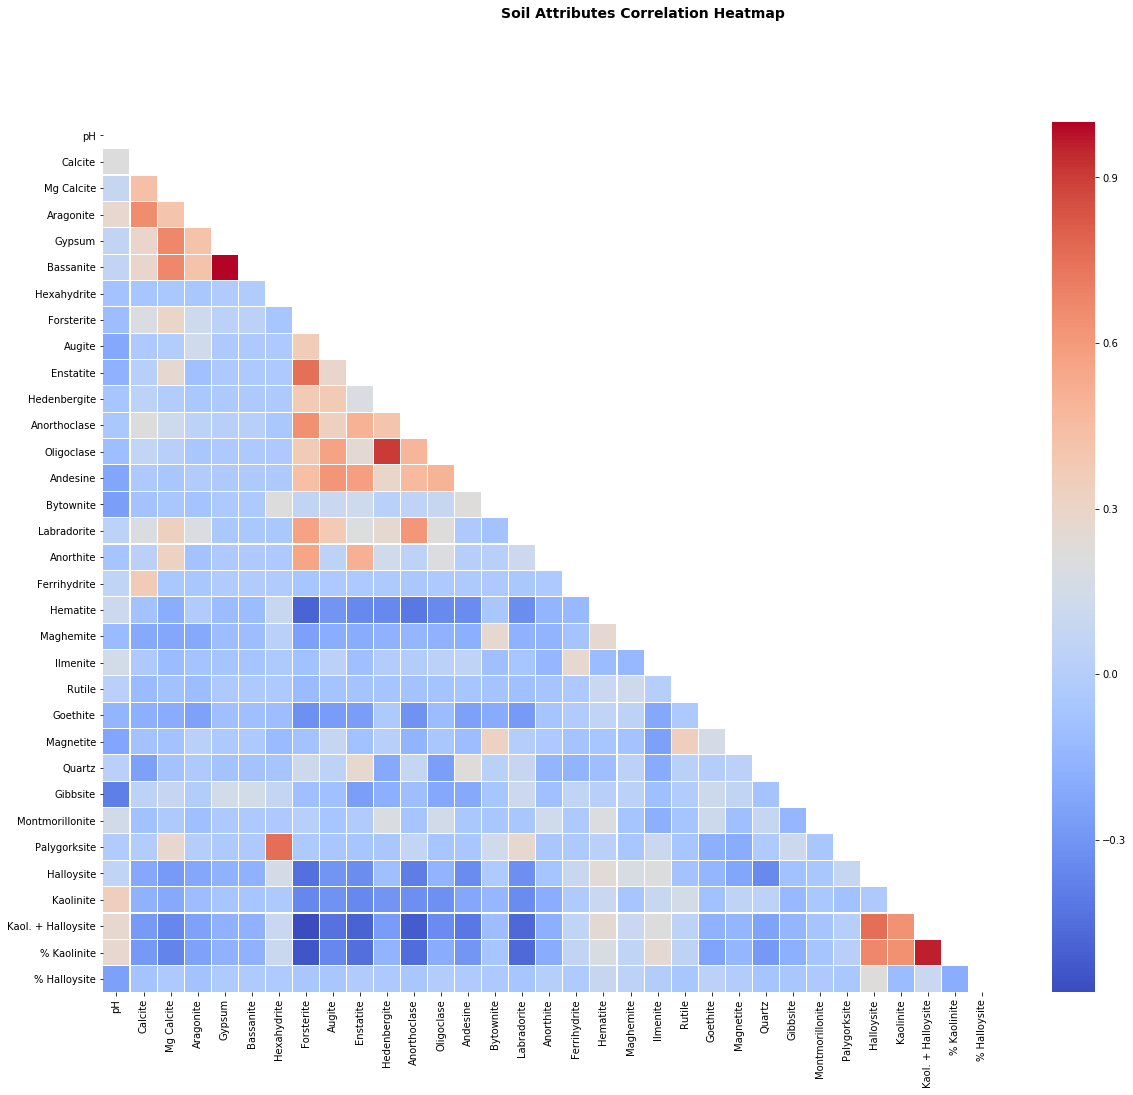

In [196]:
import seaborn as sns
import numpy as np
corr_matrix = soil_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, (ax) = plt.subplots(1, 1, figsize=(20,16))
hm = sns.heatmap(corr_matrix,
                 mask=mask,
                 ax=ax, # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 square=False,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=False, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)
fig.suptitle('Soil Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

### Individual Comparisons

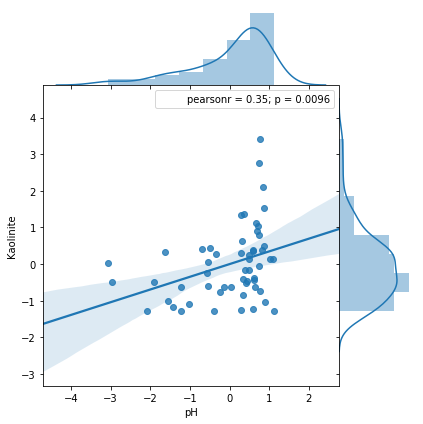

In [197]:
jp = sns.jointplot(data=final_df,
                   x='pH', 
                   y='Kaolinite', 
                   kind='reg', 
                   space=0, size=6, ratio=4)

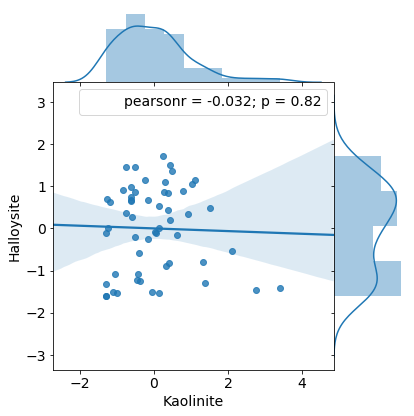

In [198]:
matplotlib.rcParams.update({'font.size': 14})
jp = sns.jointplot(data=final_df,
                   x='Kaolinite', 
                   y='Halloysite', 
                   kind='reg', 
                   space=0, size=6, ratio=4)

### Parallel Coordinates

In [199]:
final_df = soil_numeric.drop(soil_numeric.columns[-3:-1], axis=1)
final_df.pop("% Halloysite")
final_df.columns

Index([u'Soil_Sample', u'NTM culture', u'Microbiome', u'pH', u'Calcite',
       u'Mg Calcite', u'Aragonite', u'Gypsum', u'Bassanite', u'Hexahydrite',
       u'Forsterite', u'Augite', u'Enstatite', u'Hedenbergite',
       u'Anorthoclase', u'Oligoclase', u'Andesine', u'Bytownite',
       u'Labradorite', u'Anorthite', u'Ferrihydrite', u'Hematite',
       u'Maghemite', u'Ilmenite', u'Rutile', u'Goethite', u'Magnetite',
       u'Quartz', u'Gibbsite', u'Montmorillonite', u'Palygorksite',
       u'Halloysite', u'Kaolinite'],
      dtype='object')

In [200]:
### Scale Data
# Attributes of interest
cols = ['pH',
 'Kaol. + Halloysite',
 'Calcite',
 'Mg Calcite',
 'Aragonite',
 'Gypsum',
 'Bassanite',
 'Hexahydrite',
 'Forsterite',
 'Augite',
 'Enstatite',
 'Hedenbergite',
 'Anorthoclase',
 'Oligoclase',
 'Andesine',
 'Bytownite',
 'Labradorite',
 'Anorthite',
 'Ferrihydrite',
 'Hematite',
 'Maghemite',
 'Ilmenite',
 'Rutile',
 'Goethite',
 'Magnetite',
 'Quartz',
 'Gibbsite',
 'Montmorillonite',
 'Palygorksite',
 'Halloysite',
 'Kaolinite']

subset_df = soil_numeric[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, final_df['NTM culture']], axis=1)
final_df.head()

,pH,Kaol. + Halloysite,Calcite,Mg Calcite,Aragonite,Gypsum,Bassanite,Hexahydrite,Forsterite,Augite,...,Rutile,Goethite,Magnetite,Quartz,Gibbsite,Montmorillonite,Palygorksite,Halloysite,Kaolinite,NTM culture
0,-2.086045,-2.089782,-0.460532,-0.322724,-0.424655,-0.136083,-0.136083,-0.136083,0.952873,6.010956,...,-0.268507,-1.185385,0.028058,-1.190451,-0.969728,-0.259275,-0.222398,-1.604499,-1.287900,neg.
1,-1.010594,-1.884781,0.725117,-0.322724,-0.089487,-0.136083,-0.136083,-0.136083,2.361536,1.647510,...,-0.268507,-0.629383,0.813304,0.497958,2.647287,-0.259275,-0.222398,-1.498754,-1.100556,neg.
2,-1.212907,-1.867408,-0.125603,2.514003,-0.424655,-0.136083,-0.136083,-0.136083,3.770672,0.891607,...,-0.268507,-0.814450,0.633287,0.211769,-0.969728,-0.259275,-0.222398,-1.317732,-1.287900,neg.
3,0.767626,1.145994,-0.460532,-0.322724,-0.424655,-0.136083,-0.136083,-0.136083,-0.460417,-0.267754,...,-0.268507,-0.445412,-0.599824,2.483217,-0.443803,-0.259275,-0.222398,-1.413951,3.415509,neg.
4,-0.148104,0.180514,-0.460532,-0.322724,-0.424655,-0.136083,-0.136083,-0.136083,-0.460417,-0.267754,...,-0.268507,1.260229,0.269825,-0.887601,0.741312,-0.259275,-0.222398,0.751002,-0.612070,neg.


[Text(0,0,u'pH'),
 Text(0,0,u'Kaol. + Halloysite'),
 Text(0,0,u'Calcite'),
 Text(0,0,u'Mg Calcite'),
 Text(0,0,u'Aragonite'),
 Text(0,0,u'Gypsum'),
 Text(0,0,u'Bassanite'),
 Text(0,0,u'Hexahydrite'),
 Text(0,0,u'Forsterite'),
 Text(0,0,u'Augite'),
 Text(0,0,u'Enstatite'),
 Text(0,0,u'Hedenbergite'),
 Text(0,0,u'Anorthoclase'),
 Text(0,0,u'Oligoclase'),
 Text(0,0,u'Andesine'),
 Text(0,0,u'Bytownite'),
 Text(0,0,u'Labradorite'),
 Text(0,0,u'Anorthite'),
 Text(0,0,u'Ferrihydrite'),
 Text(0,0,u'Hematite'),
 Text(0,0,u'Maghemite'),
 Text(0,0,u'Ilmenite'),
 Text(0,0,u'Rutile'),
 Text(0,0,u'Goethite'),
 Text(0,0,u'Magnetite'),
 Text(0,0,u'Quartz'),
 Text(0,0,u'Gibbsite'),
 Text(0,0,u'Montmorillonite'),
 Text(0,0,u'Palygorksite'),
 Text(0,0,u'Halloysite'),
 Text(0,0,u'Kaolinite')]

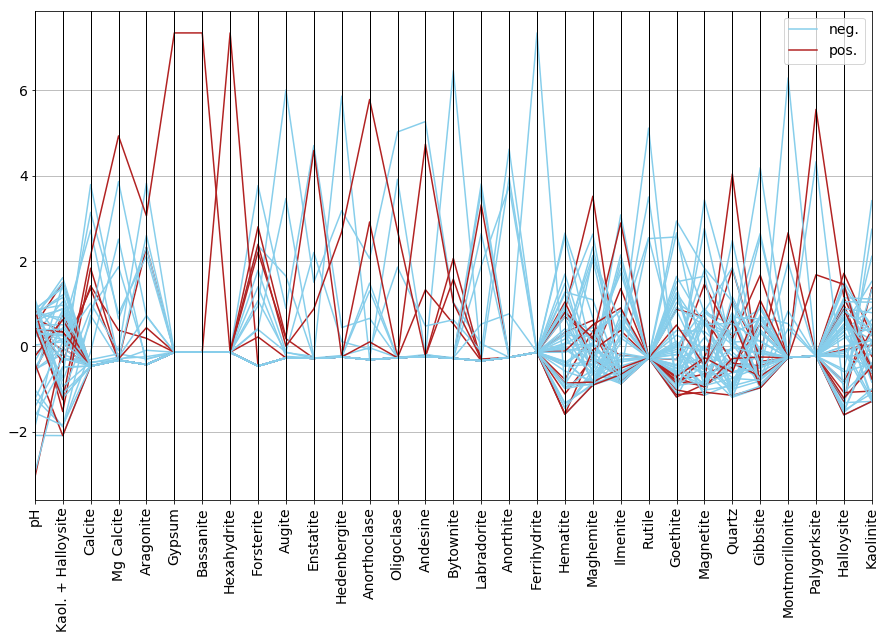

In [201]:
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 
                          'NTM culture', 
                          color=('skyblue', 'firebrick'))
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)

### Feature Importance

#### XGBoost

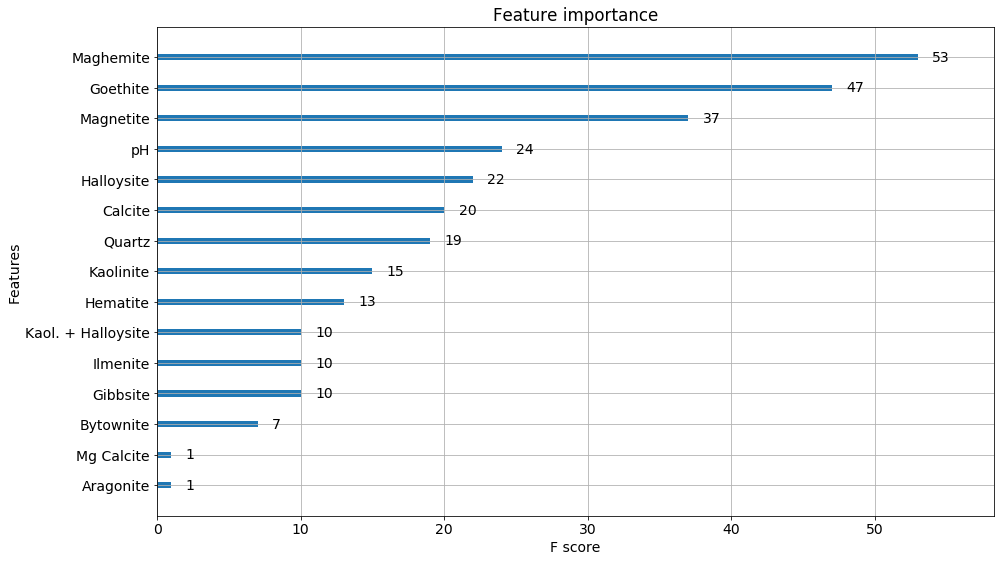

In [222]:
from xgboost import XGBClassifier
y = final_df.pop('NTM culture')

# fit model no training data
model = XGBClassifier()
model.fit(final_df, y)
# feature importance
#print(model.feature_importances_)
# plot
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#pyplot.show()
from xgboost import plot_importance
plot_importance(model)

In [223]:
importances = model.feature_importances_
df_import = pd.DataFrame(importances)
df_import.columns = ["Importance"]
df_import["Names"] = final_df.columns.astype(str)
df_import.sort_values("Importance", ascending=False).head(10)

#### Random Forest

In [219]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=1000,random_state=0)
forest.fit(final_df, y)
importances = forest.feature_importances_
df_import = pd.DataFrame(importances)
df_import.columns = ["Importance"]
df_import["Names"] = final_df.columns.astype(str)
df_import.sort_values("Importance", ascending=False).head(10)

#### RFE

In [218]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 2)
rfe = rfe.fit(final_df, y)
# summarize the selection of the attributes

score = df_import.reindex(list(rfe.ranking_))
score.sort_values("Importance", ascending=False).head(10)

### Conclusions